<a href="https://colab.research.google.com/github/khushidubeyokok/PyTorch/blob/main/PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTORCH WORKFLOW

In [ ]:
workflow= {1:"get data ready",2:"build or pick a pretrained model",3:"fit the data to model",4:"evaluate the model",5:"improve the model by experimenting",6:"save and load the model"}
workflow

{1: 'get data ready',
 2: 'build or pick a pretrained model',
 3: 'fit the data to model',
 4: 'evaluate the model',
 5: 'improve the model by experimenting',
 6: 'save and load the model'}

from scartch - https://www.youtube.com/watch?v=4061WI4BEfY

In [ ]:
#import required libraries
import torch
from torch import nn
import numpy as np
import random
import matplotlib.pyplot as plt

## Preparing and loading data
 data can be anything
 - structured data : excel sheet , text
 - unstructured data : images , video ,audio, webpage etc
---

 Machine Learning involves two major steps
 - converting the data into numerical representation
 - building model to learn patterns in that numerical representation

we will use **linear regression formula** to make a straight line with *known* parameters


### Create data

In [ ]:
# Create known parameters
weight=0.26
bias=0.18

# Create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X+bias
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1800],
         [0.1852],
         [0.1904],
         [0.1956],
         [0.2008],
         [0.2060],
         [0.2112],
         [0.2164],
         [0.2216],
         [0.2268]]))

### Split the data into training data set and test data set

three sets of data
- Training set
- Validating set
- Testing set

In [ ]:
# lets split the data into training and testing - 80:20
SplitLength=int(0.8*len(X))
XTrainSet=X[:SplitLength]
YTrainSet=Y[:SplitLength]
XTestSet=X[SplitLength:]
YTestSet=Y[SplitLength:]

len(XTrainSet),len(YTrainSet),len(XTestSet),len(YTestSet)

(40, 40, 10, 10)

###Build a function to visualize this data

In [ ]:
def plot_predictions(train_data=XTrainSet, train_labels=YTrainSet, test_data=XTestSet, test_labels=YTestSet, predictions=None):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_labels,c="r",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="b",s=4,label="Predictions")
  plt.legend(prop={"size":14})

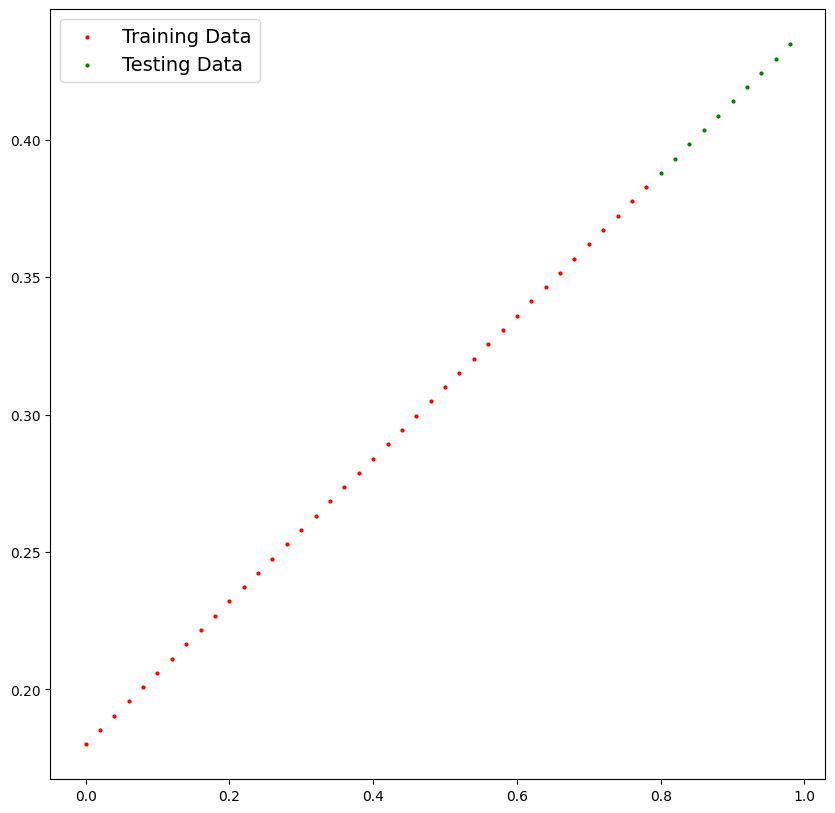

In [ ]:
plot_predictions()

## Build A Model
 let's build a model to use the red dots to predict the green dots


In [ ]:
class OurModel(nn.Module):  # nn.module is the Base class for all neural network modules
  def __init__(self):
    super().__init__() # initialize the attributes of the nn.module class.
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #start with random weights (this will get adjusted as the model learns)
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # start with random biases (this will get adjusted as the model learns)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias #linear regression formula

### PyTorch has four essential modules you can use to create almost any kind of neural network you can imagine.
They are:
-  `torch.nn`Contains all of the building blocks for computational graphs , `torch.nn.Parameter` Stores tensors that can be used with nn.Module , `torch.nn.module` The base class for all neural network modules
-`torch.optim` Contains various optimization algorithms
- `torch.utils.data.Dataset` allow you to use pre-loaded datasets as well as your own data. Represent a map between key{label} and values{data}
- `torch.utils.data.DataLoader.` represents a Python iterable over a dataset

### Check contents of our model
to check the parameters use `.parameter()`

In [ ]:
torch.manual_seed(2618)

#Create an instance of our model
model_0=OurModel()

#Check the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([-1.8891], requires_grad=True),
 Parameter containing:
 tensor([-0.9128], requires_grad=True)]

In [ ]:
# Better way to check the content
model_0.state_dict()

OrderedDict([('weights', tensor([-1.8891])), ('bias', tensor([-0.9128]))])

### Making Predictions using `torch.inference.mode()`

when we pass the data to our model , it runs it through forward() method

In [ ]:
## Make predictions with our model

with torch.inference_mode():
  Y_predictions=model_0(XTestSet)
print(Y_predictions)
print(YTestSet)

tensor([[-2.4241],
        [-2.4619],
        [-2.4997],
        [-2.5375],
        [-2.5753],
        [-2.6130],
        [-2.6508],
        [-2.6886],
        [-2.7264],
        [-2.7642]])
tensor([[0.3880],
        [0.3932],
        [0.3984],
        [0.4036],
        [0.4088],
        [0.4140],
        [0.4192],
        [0.4244],
        [0.4296],
        [0.4348]])


### Plot predictions

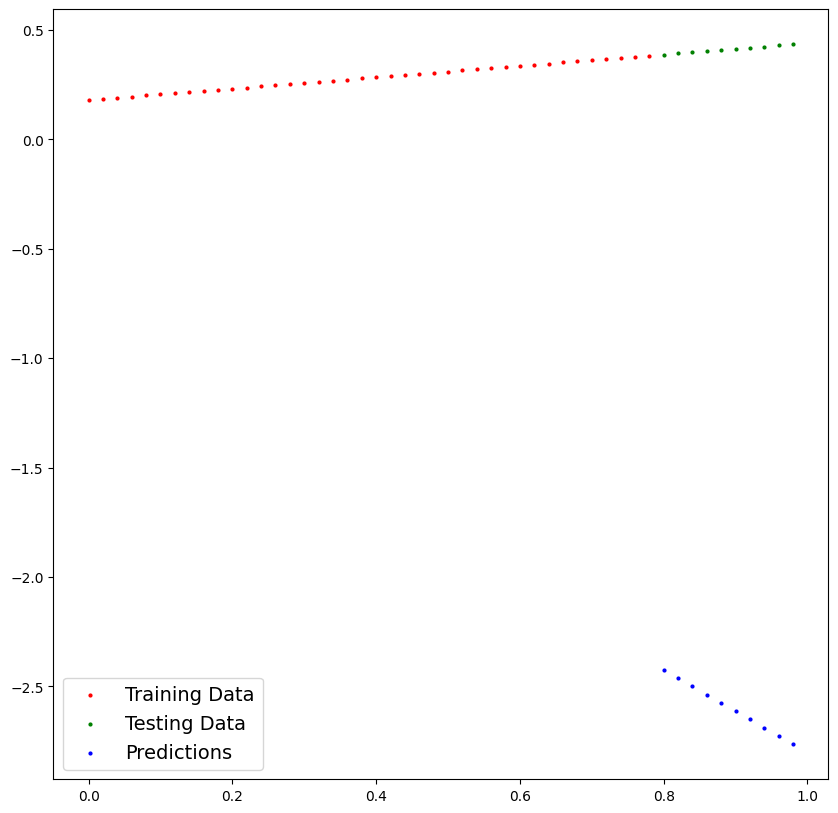

In [ ]:
plot_predictions(predictions=Y_predictions) # our goal is to bring the blue (prediction)line close to green(testdata) line

## 3. Train and evaluate Model
Training the model leads to move from unknown parameters (random values) to known parameters

* Loss function
* Optimizer

### Setting up a Loss function

- It measure how wrong our model's predictions are to the ideal outputs
- The goal is make the loss function minimum

- https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
lossfn=nn.L1Loss() # Mean absolute error

### Setting up an optimiser

Takes into account the loss of a model and adjusts the parametes to improve the loss function
- https://pytorch.org/docs/stable/optim.html

In [ ]:
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.001) ## lr is a hyper parameter , SGD is stochastic gradient descent

### Building a training and testing loop in Pytorch



1. Forward pass - The model goes through all of the training data once, performing its forward() function calculations.
2.Calculate the loss -	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.
3. Zero gradients- The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.
4. Perform backpropagation -  on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".
5. Update the optimizer (gradient descent)	- Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.



In [ ]:
epochs=500
epochCount=[]
trainLossList=[]
testLossList=[]

# 0.Loop through the data
for epoch in range(epochs):
  model_0.train() # put the model in train mode (train mode sets all parameters that req gradient to reg gradients)

  # 1.Forward pass
  Y_predictions=model_0(XTrainSet)

  # 2.Calculate the loss
  loss=lossfn(Y_predictions,YTrainSet)

  # 3.Optimiser zero grad
  optimiser.zero_grad()

  # 4.Perform backpropagation
  loss.backward()

  # 5.Update the optimizer
  optimiser.step() # by default opyimiser changes will accumulate through the loop , so we have to zero the grad in step 3


  ### testing
  model_0.eval() # put the model in eval mode (eval mode turns off gradient tracking and other settings not needed for testing)
  with torch.inference_mode(): ##turns off gradient tracking

    # 1. do the forward pass
    testPreds=model_0(XTestSet)

    # 2. calculate the loss
    testLoss=lossfn(testPreds,YTestSet)

  if epoch % 100 == 0:
    epochCount.append(epoch)
    trainLossList.append(loss)
    testLossList.append(testLoss)
    print(f"|epoch={epoch}|,|trainingloss={loss}|,|testingloss={testLoss}|")
    print(model_0.state_dict())

|epoch=0|,|trainingloss=0.05738980695605278|,|testingloss=0.08121578395366669|
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])
|epoch=100|,|trainingloss=0.05738980695605278|,|testingloss=0.08121578395366669|
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])
|epoch=200|,|trainingloss=0.05738980695605278|,|testingloss=0.08121578395366669|
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])
|epoch=300|,|trainingloss=0.05738980695605278|,|testingloss=0.08121578395366669|
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])
|epoch=400|,|trainingloss=0.05738980695605278|,|testingloss=0.08121578395366669|
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])


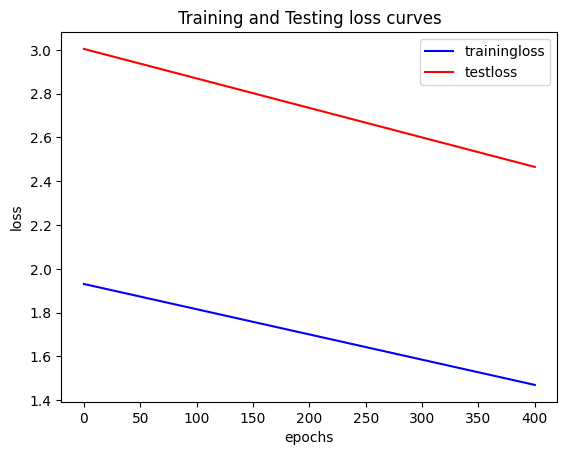

In [ ]:
## Plot loss curves
plt.plot(epochCount,np.array(torch.Tensor(trainLossList).cpu().numpy()),label="trainingloss",c='b') # matplotlib works on numpy
plt.plot(epochCount,testLossList,label="testloss",c='r')
plt.title('Training and Testing loss curves')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

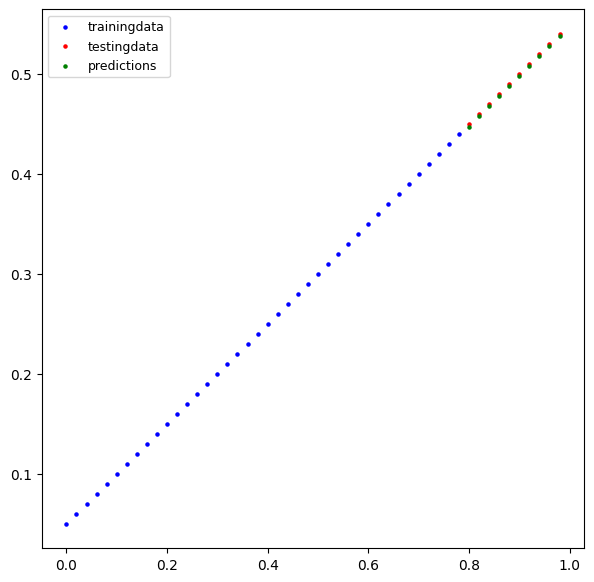

In [ ]:
# plot test results
plot_predictions(predictions=testPreds)

## Save and load the model

https://pytorch.org/tutorials/beginner/saving_loading_models.html

Three methods to save and load a model in pytorch:
- `torch.save()` -> Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- `torch.load()` -> Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory.
- `torch.nn.Module.load_state_dict`-> Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.


In [ ]:
from pathlib import Path

# 1. create models directory
ModelPath=Path('models')
ModelPath.mkdir(parents=True,exist_ok=True)

# 2. create model save path
ModelName="model_0"
ModelSavePath=ModelPath/ModelName

ModelSavePath

# 3. Save the model
torch.save(obj=model_0.state_dict(),
           f=ModelSavePath)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1496 Sep  1 09:31 model_0


### Loading our pytorch model

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the entire model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).




In [ ]:
# create a new instance
loadedModel_0=OurModel()
print(loadedModel_0.state_dict())

# load the statedict of model_0 to loadedmodel
loadedModel_0.load_state_dict(torch.load(f=ModelSavePath))
print(loadedModel_0.state_dict())
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.5987])), ('bias', tensor([0.5034]))])
OrderedDict([('weights', tensor([-1.6941])), ('bias', tensor([-0.4128]))])
OrderedDict([('weights', tensor([-1.6941])), ('bias', tensor([-0.4128]))])


<ipython-input-137-25d971c40e32>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadedModel_0.load_state_dict(torch.load(f=ModelSavePath))


### evaluate loaded model

In [ ]:
with torch.inference_mode():
  loadedmodelpreds=loadedModel_0(XTestSet)
  savedmodelpreds=model_0(XTestSet)

loadedmodelpreds==savedmodelpreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting everything together (using `nn.Parameter()`)

In [ ]:
## importing important libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
## device agnostic code
if torch.cuda.is_available():
  device="cuda"
else:
   device="cpu"

print(f"device:{device}")

device:cpu


In [ ]:
# Data

weight=0.5
bias=0.05

start=0
stop=1
step=0.02
x = torch.arange(start,stop,step).unsqueeze(dim=1)
y=weight*x+bias

length=int(0.8*len(x))
xtrainset = x[:length]
ytrainset = y[:length]
xtestset= x[length:]
ytestset= y[length:]

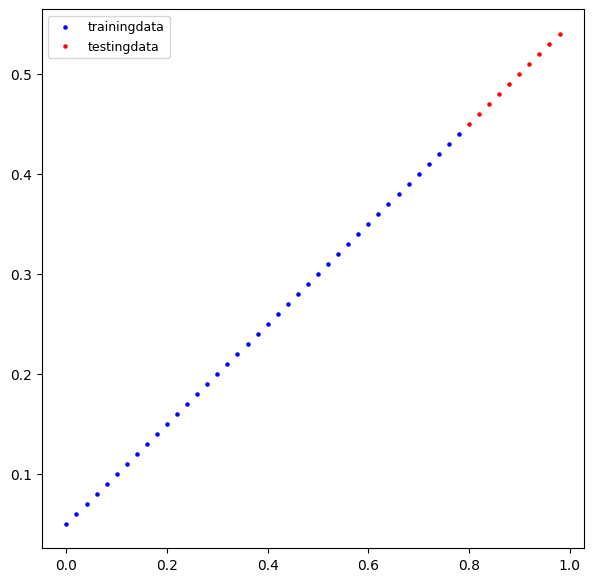

In [ ]:
#set  up a function to visualise data

def plot_predictions(train_data=xtrainset,train_labels=ytrainset, test_data=xtestset, test_labels=ytestset, predictions=None):
  plt.figure(figsize=(7,7))
  plt.scatter(train_data,train_labels,c='b',s=5,label='trainingdata')
  plt.scatter(test_data,test_labels,c='r',s=5,label='testingdata')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=5,label='predictions')
  plt.legend(prop={"size":9})

plot_predictions()

In [ ]:
# build model
class ourmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return x*self.weight+self.bias


In [ ]:
# create instance of our model
torch.manual_seed(255)
model_0=ourmodel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.7677])), ('bias', tensor([0.0509]))])

In [ ]:
# make predicitons
with torch.inference_mode():
   ypreds=model_0(xtestset)

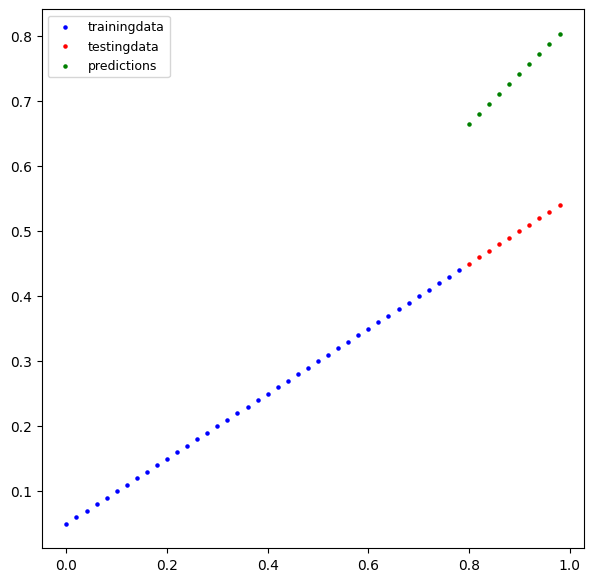

In [ ]:
# plot predictions
plot_predictions(predictions=ypreds)

In [ ]:
# set up loss function
lossfn=nn.L1Loss()

#set up optimiser
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
# train and test model

epochs=200
for epoch in range(epochs):
  model_0.train() # turn on training mode
  ypredictions=model_0(xtrainset) # make prediciotns
  loss=lossfn(ypredictions,ytrainset) #calculate loss
  optimiser.zero_grad() #set optimiser to zero
  loss.backward() # back propogation
  optimiser.step() #step optimiser

  model_0.eval()
  with torch.inference_mode():
    ytestpreds=model_0(xtestset)
    testloss=lossfn(ytestpreds,ytestset)

  if epoch % 20 == 0:
    print(f"|epoch:{epoch}|,|trainloss:{loss}|,|testloss:{testloss}|")

|epoch:0|,|trainloss:0.10527446120977402|,|testloss:0.2256779670715332|
|epoch:20|,|trainloss:0.04130714014172554|,|testloss:0.10315179824829102|
|epoch:40|,|trainloss:0.0340285524725914|,|testloss:0.0790868028998375|
|epoch:60|,|trainloss:0.027160998433828354|,|testloss:0.0625419020652771|
|epoch:80|,|trainloss:0.02029617317020893|,|testloss:0.04668385908007622|
|epoch:100|,|trainloss:0.013424632139503956|,|testloss:0.03082585707306862|
|epoch:120|,|trainloss:0.00655372953042388|,|testloss:0.014280939474701881|
|epoch:140|,|trainloss:0.004498512018471956|,|testloss:0.011086779646575451|
|epoch:160|,|trainloss:0.004498512018471956|,|testloss:0.011086779646575451|
|epoch:180|,|trainloss:0.004498512018471956|,|testloss:0.011086779646575451|


In [ ]:
model_0.state_dict(), weight,bias

(OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))]),
 0.5,
 0.05)

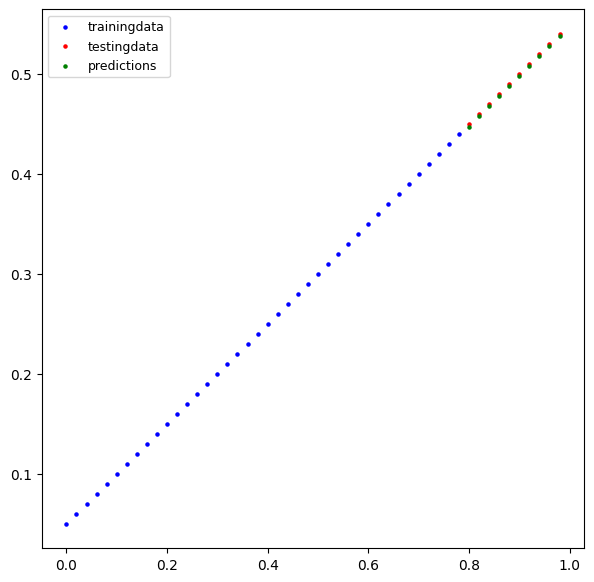

In [ ]:
# plot new preds
plot_predictions(predictions=ytestpreds)

In [ ]:
# save and load the model
from pathlib import Path

modelpath=Path('using_nn.Parameter') #create save directory
modelpath.mkdir(parents=True,exist_ok=True)
modelname = "newmodel.pth"
modelsavepath=modelpath/modelname #create save path

torch.save(obj=model_0.state_dict(),f=modelsavepath) #save model parameter
# create a new instance
loadedModel_0=ourmodel()
print(f"before loading {loadedModel_0.state_dict()}")
# load the statedict of model_0 to loadedmodel
loadedModel_0.load_state_dict(torch.load(f=modelsavepath))
print(loadedModel_0.state_dict())
print(model_0.state_dict())

before loading OrderedDict([('weight', tensor([0.0971])), ('bias', tensor([0.9270]))])
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])
OrderedDict([('weight', tensor([0.5042])), ('bias', tensor([0.0439]))])


<ipython-input-151-756d423bece3>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadedModel_0.load_state_dict(torch.load(f=modelsavepath))


# Putting Everything Together Using `nn.Linear()`

In [ ]:
## importing important libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
## device agnostic code
if torch.cuda.is_available():
  device="cuda"
else:
   device="cpu"

print(f"device:{device}")

device:cpu


In [ ]:
# Data
weight=0.5
bias=0.05
start=0
stop=1
step=0.02
x = torch.arange(start,stop,step).unsqueeze(dim=1)
y=weight*x+bias

length=int(0.8*len(x))
xtrainset = x[:length]
ytrainset = y[:length]
xtestset= x[length:]
ytestset= y[length:]

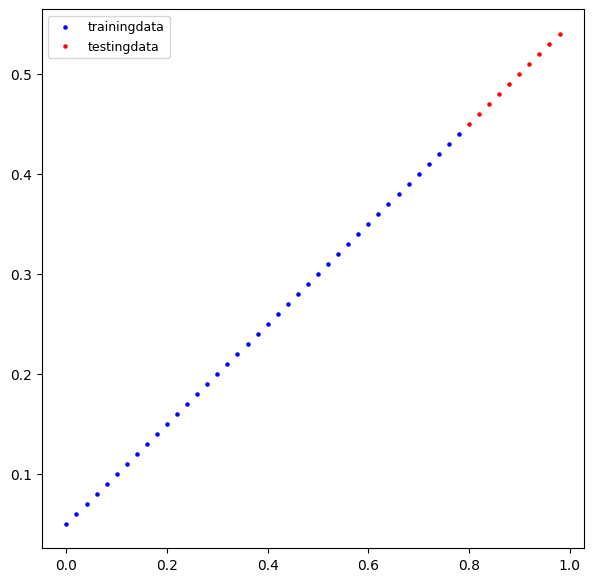

In [ ]:
#set  up a function to visualise data

def plot_predictions(train_data=xtrainset,train_labels=ytrainset, test_data=xtestset, test_labels=ytestset, predictions=None):
  plt.figure(figsize=(7,7))
  plt.scatter(train_data,train_labels,c='b',s=5,label='trainingdata')
  plt.scatter(test_data,test_labels,c='r',s=5,label='testingdata')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=5,label='predictions')
  plt.legend(prop={"size":9})

plot_predictions()

In [ ]:
# build model
class Linearmodel(nn.Module):
  def __init__(self):
    super().__init__()
    ## use nn.Linear() for creating model parameters
    self.linear_layer=nn.Linear(in_features=1,out_features=1) # takes one input apllies linear transformation and gives one output

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)


In [ ]:
# create instance of our model
torch.manual_seed(25)
model=Linearmodel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5036]])),
             ('linear_layer.bias', tensor([-0.6142]))])

In [ ]:
# make predicitons
with torch.inference_mode():
   ypreds=model_0(xtestset)

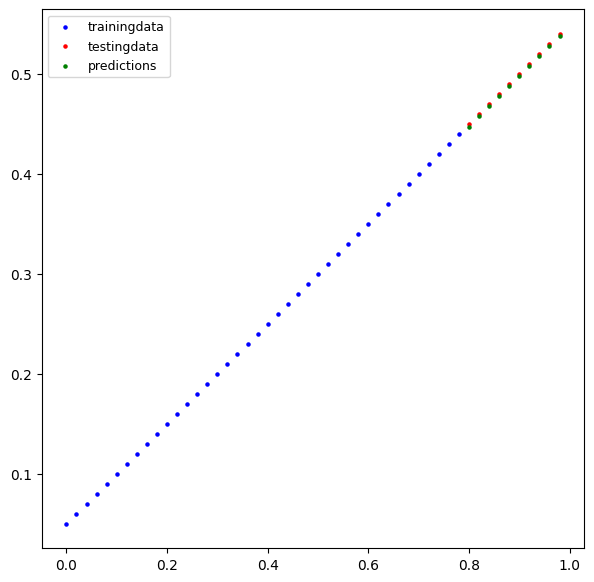

In [ ]:
# plot predictions
plot_predictions(predictions=ypreds)

In [ ]:
# set up loss function
lossfn=nn.L1Loss()

#set up optimiser
optimiser=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [ ]:
# train and test model

epochs=200
for epoch in range(epochs):
  model.train() # turn on training mode
  ypredictions=model(xtrainset) # make prediciotns
  loss=lossfn(ypredictions,ytrainset) #calculate loss
  optimiser.zero_grad() #set optimiser to zero
  loss.backward() # back propogation
  optimiser.step() #step optimiser

  model.eval()
  with torch.inference_mode():
    ytestpreds=model(xtestset)
    testloss=lossfn(ytestpreds,ytestset)

  if epoch % 20 == 0:
    print(f"|epoch:{epoch}|,|trainloss:{loss}|,|testloss:{testloss}|")

|epoch:0|,|trainloss:0.6628330945968628|,|testloss:0.6475843191146851|
|epoch:20|,|trainloss:0.43241339921951294|,|testloss:0.3781646192073822|
|epoch:40|,|trainloss:0.20199361443519592|,|testloss:0.10874490439891815|
|epoch:60|,|trainloss:0.044978026300668716|,|testloss:0.0846061110496521|
|epoch:80|,|trainloss:0.03658274561166763|,|testloss:0.08471589535474777|
|epoch:100|,|trainloss:0.02971349097788334|,|testloss:0.0688578337430954|
|epoch:120|,|trainloss:0.02284030243754387|,|testloss:0.052312932908535004|
|epoch:140|,|trainloss:0.015975486487150192|,|testloss:0.036454938352108|
|epoch:160|,|trainloss:0.00910956785082817|,|testloss:0.02059689722955227|
|epoch:180|,|trainloss:0.002236062427982688|,|testloss:0.004738891031593084|


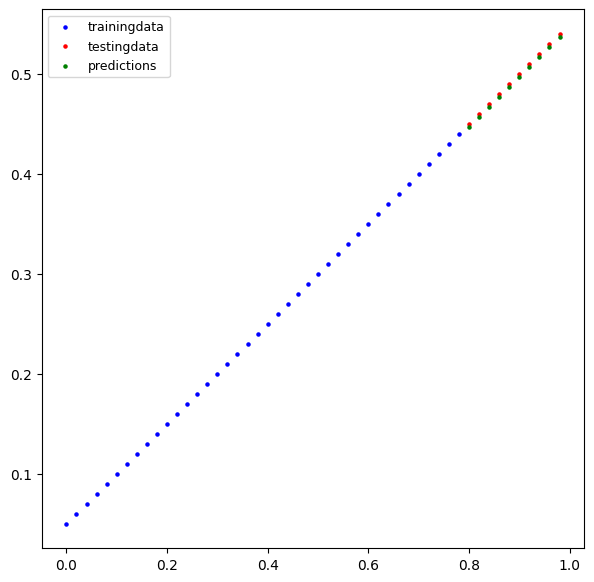

In [ ]:
# plot new preds
plot_predictions(predictions=ytestpreds) # matplotlib works on numpy so change to cpu whenever required [x.to(cuda), or x.cpu()]

In [ ]:
# save and load the model
from pathlib import Path

modelpath=Path('using_nn.Linear') #create save directory
modelpath.mkdir(parents=True,exist_ok=True)
modelname = "linearmodel.pth"
modelsavepath=modelpath/modelname #create save path

torch.save(obj=model.state_dict(),f=modelsavepath) #save model parameter
# create a new instance
loadedModel_0=Linearmodel()
print(f"before loading {loadedModel_0.state_dict()}")
# load the statedict of model to loadedmodel
loadedModel_0.load_state_dict(torch.load(f=modelsavepath))
print(loadedModel_0.state_dict())
print(model.state_dict())

before loading OrderedDict([('linear_layer.weight', tensor([[-0.8742]])), ('linear_layer.bias', tensor([0.8235]))])
OrderedDict([('linear_layer.weight', tensor([[0.5032]])), ('linear_layer.bias', tensor([0.0438]))])
OrderedDict([('linear_layer.weight', tensor([[0.5032]])), ('linear_layer.bias', tensor([0.0438]))])


<ipython-input-163-c22c224275fa>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadedModel_0.load_state_dict(torch.load(f=modelsavepath))


In [ ]:
# evaluate the model
with torch.inference_mode():
  savedpreds=model(xtestset)
  loadedpreds=loadedModel_0(xtestset)

savedpreds==loadedpreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])